# Image classification

### import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import dataset

In [4]:
mnist=keras.datasets.fashion_mnist
type(mnist)

module

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [7]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
np.max(x_train)

255

In [9]:
np.mean(x_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names=['top','trouser','pullover','dress','coat','sandal','short','sneaker','bag','ankle boot']

## Data Exploration

In [12]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

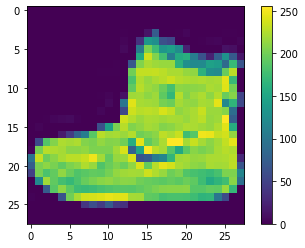

In [13]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
# 9 number in class is boot
#in color bar values are between 0 and 255,tobring this value below 1 deviede data by 255

In [16]:
x_train=x_train/255.0

In [17]:
x_test=x_test/255.0

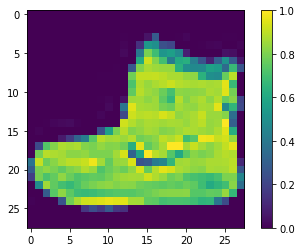

In [18]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

## Build the model TF 2.0

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [20]:
model= Sequential()

In [21]:
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))   #output layer

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model compilation
- Loss fuction
- Optimizer
- Matrix


In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## train the model

In [24]:
hist=model.fit(x_train,y_train,epochs=10,batch_size=10,validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.4939 - accuracy: 0.8236 - val_loss: 0.4296 - val_accuracy: 0.8468
Epoch 2/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.3763 - accuracy: 0.8618 - val_loss: 0.3671 - val_accuracy: 0.8647
Epoch 3/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.3402 - accuracy: 0.8749 - val_loss: 0.3713 - val_accuracy: 0.8646
Epoch 4/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.3153 - accuracy: 0.8825 - val_loss: 0.3362 - val_accuracy: 0.8789
Epoch 5/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.2986 - accuracy: 0.8895 - val_loss: 0.3403 - val_accuracy: 0.8784
Epoch 6/10
4800/4800 [==============================] - 12s 2ms/step - loss: 0.2843 - accuracy: 0.8947 - val_loss: 0.3314 - val_accuracy: 0.8806
Epoch 7/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.2734 - accuracy: 0.8984 - val_loss: 0.3312 - val_ac

In [25]:
tf.keras.metrics.Accuracy

tensorflow.python.keras.metrics.Accuracy

In [26]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3798 - accuracy: 0.8768


In [27]:
print(test_acc)

0.876800000667572


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)

0.8768

In [32]:
pred=model.predict(x_test)

In [33]:
pred

array([[1.6965153e-06, 4.4674034e-10, 6.9220385e-09, ..., 1.7543350e-03,
        4.8006217e-09, 9.9788660e-01],
       [3.7579419e-05, 1.9487222e-13, 9.9856049e-01, ..., 1.2997065e-25,
        1.4677282e-12, 1.1737721e-15],
       [4.6371201e-07, 9.9999940e-01, 5.2681193e-16, ..., 0.0000000e+00,
        1.4408879e-17, 5.1024063e-34],
       ...,
       [3.1195884e-04, 6.4721034e-10, 1.4928853e-05, ..., 9.7788336e-15,
        9.9806041e-01, 8.0946656e-16],
       [2.8451450e-10, 9.9995911e-01, 1.2827894e-13, ..., 1.0242192e-15,
        4.2782206e-13, 2.1797989e-16],
       [4.6471654e-05, 2.2504392e-09, 9.2015455e-07, ..., 2.1558155e-03,
        1.5549667e-03, 1.3612978e-04]], dtype=float32)

In [34]:
pred[0]

array([1.6965153e-06, 4.4674034e-10, 6.9220385e-09, 1.4244527e-12,
       3.9512678e-11, 3.5578990e-04, 1.5852595e-06, 1.7543350e-03,
       4.8006217e-09, 9.9788660e-01], dtype=float32)

In [35]:
# 99 % its boot

In [36]:
np.argmax(pred[0])

9

In [37]:
np.argmax(pred[1])

2

### Ploting Learning curve and confusion matrix

In [38]:
#! pip install mlxtend

In [39]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.

In [40]:
hist.history

{'loss': [0.49389350414276123,
  0.3762526512145996,
  0.340221107006073,
  0.3153175115585327,
  0.2985537052154541,
  0.28431999683380127,
  0.2734212577342987,
  0.26235535740852356,
  0.25130176544189453,
  0.24313272535800934],
 'accuracy': [0.823645830154419,
  0.8618124723434448,
  0.874916672706604,
  0.8824999928474426,
  0.8894791603088379,
  0.8946666717529297,
  0.8983749747276306,
  0.9009791612625122,
  0.90625,
  0.9073541760444641],
 'val_loss': [0.42957642674446106,
  0.3671056032180786,
  0.37126481533050537,
  0.3362012505531311,
  0.34033671021461487,
  0.331362783908844,
  0.3312023878097534,
  0.3388729393482208,
  0.3378247618675232,
  0.3502752184867859],
 'val_accuracy': [0.846750020980835,
  0.8646666407585144,
  0.8645833134651184,
  0.8789166808128357,
  0.8784166574478149,
  0.8805833458900452,
  0.8837500214576721,
  0.8820833563804626,
  0.8825833201408386,
  0.8831666707992554]}

In [41]:
import matplotlib.pyplot as plt

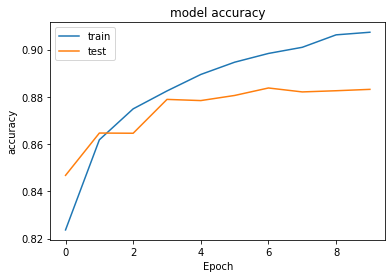

In [42]:
# plot training and validation accuracy values

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

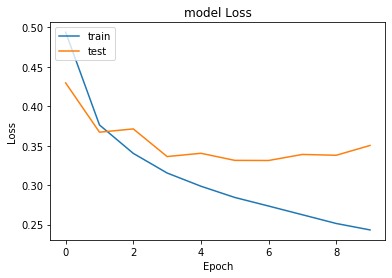

In [43]:
# plot training and validation loss values

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Confusion Matrix

In [44]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13425959888>)

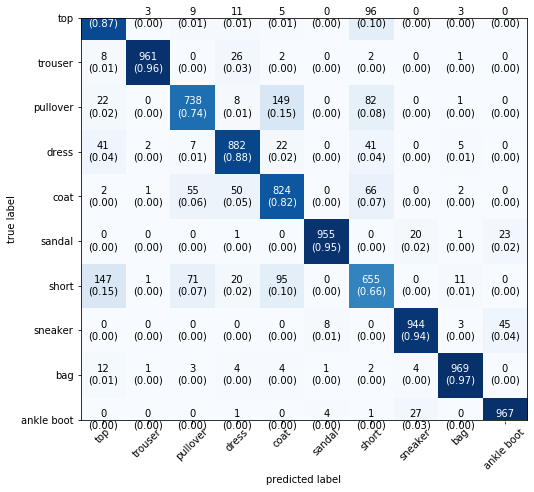

In [46]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names = class_names,show_normed=True)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x134258f9c48>)

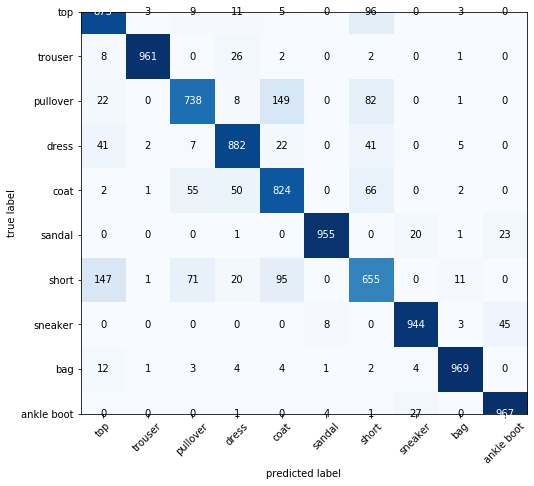

In [47]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names = class_names)